In [2]:
import json
import math
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Opening JSON file with QR uncert.
# f = open('/eos/project/d/dshep/TOPCLASS/DijetAnomaly/QR_models/envelope/cut_stats.json',)
# f = open('/eos/project/d/dshep/TOPCLASS/DijetAnomaly/QR_models/envelope/cut_stats_q357.json',)
f = open ('qr_fit_jsons/cut_stats_allQ_GtoWW35na_xsec_20.json',)
qr_unc = json.load(f)
# for i in qr_unc['q30']:
#     print("{} {} {} {}".format(i[0],i[1],math.fabs(i[1]-i[4]),math.fabs(i[4]-i[1])))
# f.close()

q01
np.poly1d([-2.92543887e-18  2.55771950e-14 -4.91244700e-11  3.49405242e-07
 -1.44987065e-04  1.70890247e+00])


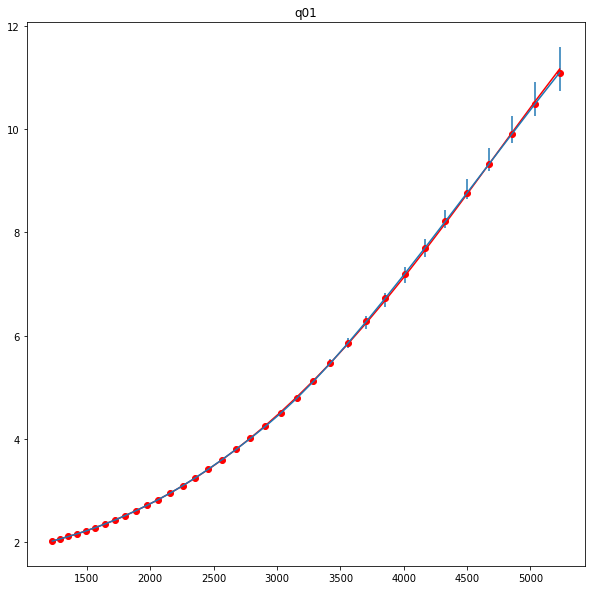

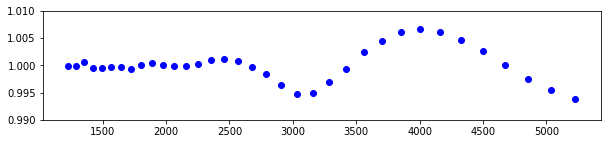

q10
np.poly1d([-4.14239710e-18  4.51941757e-14 -1.56448421e-10  4.98398071e-07
 -2.85656565e-04  1.67958407e+00])


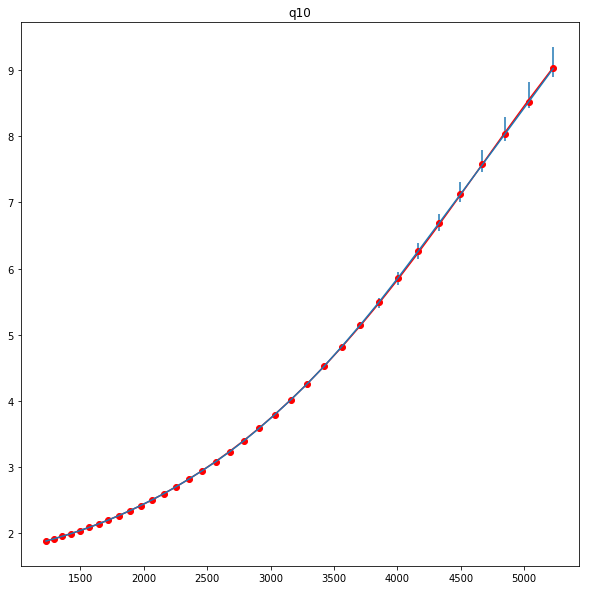

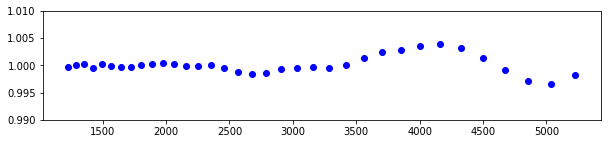

q30
np.poly1d([-9.09728131e-19  5.17009531e-15  3.32934307e-11 -8.07786083e-09
  3.18107107e-04  1.34676453e+00])


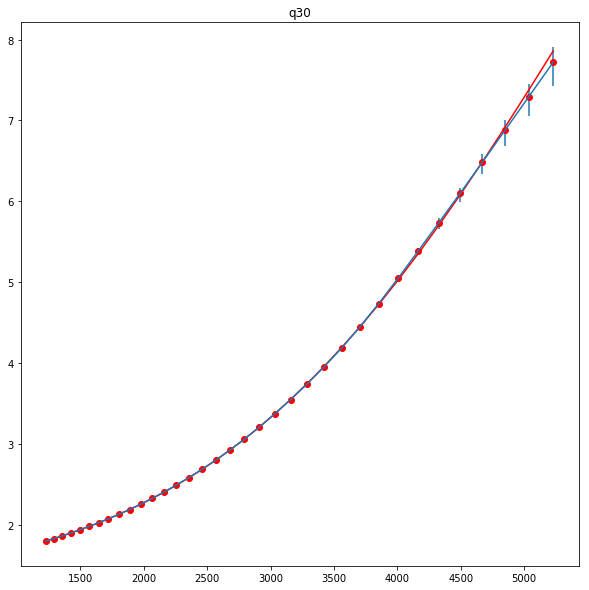

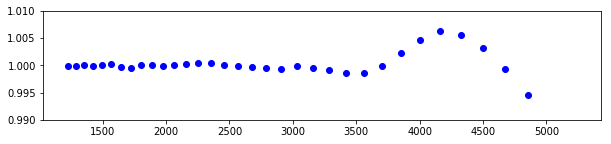

q50
np.poly1d([-1.43827905e-18  9.26685306e-15  2.63817811e-11 -6.51702062e-08
  4.44725822e-04  1.22485608e+00])


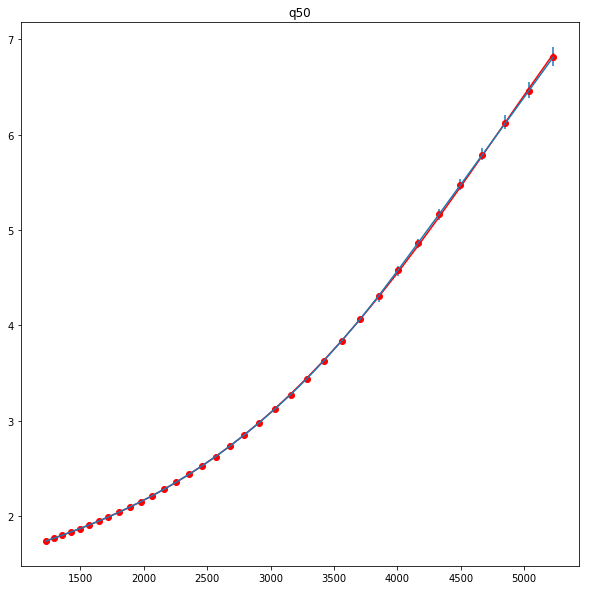

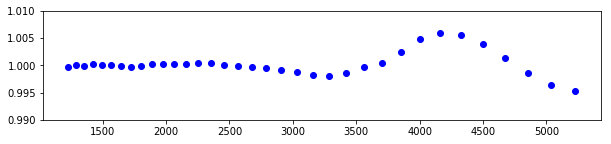

q70
np.poly1d([ 7.19696902e-19 -1.77178546e-14  1.58732470e-10 -4.26150250e-07
  9.11181145e-04  9.46338746e-01])


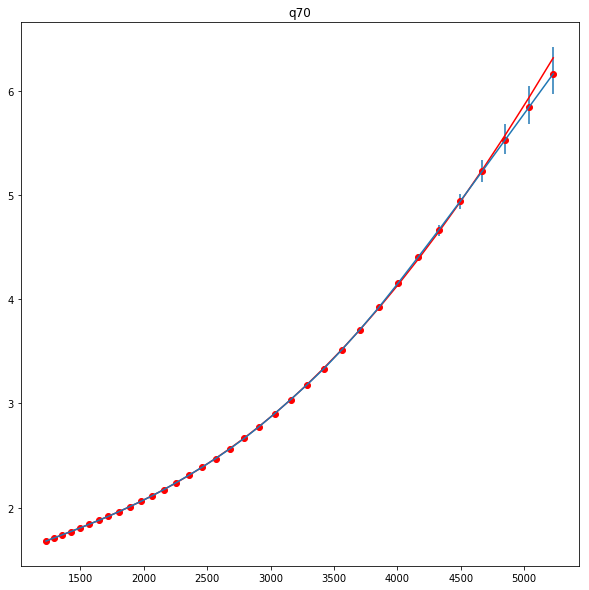

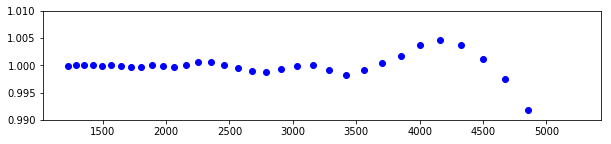

q90
np.poly1d([-1.21246562e-18  4.10118954e-15  7.07686039e-11 -3.29779786e-07
  9.46914691e-04  7.82023941e-01])


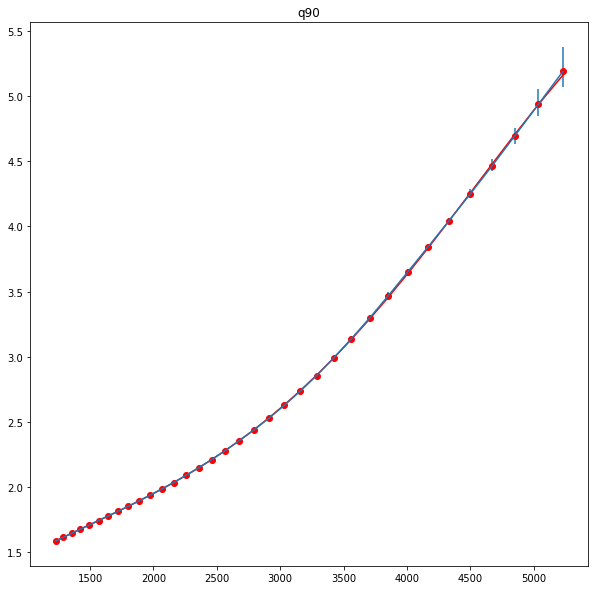

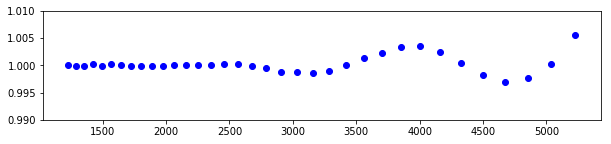

0.99 : np.poly1d([-2.92543887e-18  2.55771950e-14 -4.91244700e-11  3.49405242e-07
 -1.44987065e-04  1.70890247e+00]),
0.9 : np.poly1d([-4.14239710e-18  4.51941757e-14 -1.56448421e-10  4.98398071e-07
 -2.85656565e-04  1.67958407e+00]),
0.7 : np.poly1d([-9.09728131e-19  5.17009531e-15  3.32934307e-11 -8.07786083e-09
  3.18107107e-04  1.34676453e+00]),
0.5 : np.poly1d([-1.43827905e-18  9.26685306e-15  2.63817811e-11 -6.51702062e-08
  4.44725822e-04  1.22485608e+00]),
0.3 : np.poly1d([ 7.19696902e-19 -1.77178546e-14  1.58732470e-10 -4.26150250e-07
  9.11181145e-04  9.46338746e-01]),
0.1 : np.poly1d([-1.21246562e-18  4.10118954e-15  7.07686039e-11 -3.29779786e-07
  9.46914691e-04  7.82023941e-01]),


In [4]:
# qrs = ['01','10','90']
# qrs = ['30','50','70']
qrs = ['01','10','30','50','70','90']

coeffs = {}
for qr in qrs:
    qstring = 'q{}'.format(qr)
    x      = np.array([i[0] for i in qr_unc[qstring]])
    y      = np.array([i[1] for i in qr_unc[qstring]])
    y_down = np.fabs(y-np.array([i[3] for i in qr_unc[qstring]]))
    y_up   = np.fabs(y-np.array([i[4] for i in qr_unc[qstring]]))

    x      = x     [:35] 
    y      = y     [:35] 
    y_down = y_down[:35] 
    y_up   = y_up  [:35] 


#     xp = np.linspace(x[0], x[-1])

    fig, ax1 = plt.subplots(figsize=(10,10))

    asymmetric_error = [y_down, y_up]

    ax1.errorbar(x, y, yerr=asymmetric_error, fmt='-')
    ax1.set_title(qstring)
#     ax1.set_yscale('log')
    coefficients = np.polyfit(x, y, 5, w=1/(y_up+y_down))
    coeffs[qr] = coefficients
    print(qstring)
    print("np.poly1d({})".format(coefficients))
    poly = np.poly1d(coefficients)
    new_y = poly(x)
    plt.plot(x, y, "o", x, new_y,color="red")
    fig.savefig('fit_xs100_{}.pdf'.format(qr))
    fig2, ax2 = plt.subplots(figsize=(10,2))
    ratio = y/new_y
    plt.plot(x, ratio, "o",color="blue")
    plt.ylim([0.99,1.01])
    plt.show()
    fig2.savefig('ratio_xs100_{}.pdf'.format(qr))

for qr in qrs:
    print("{} : np.poly1d({}),".format(1.-float(qr)/100,coeffs[qr]))


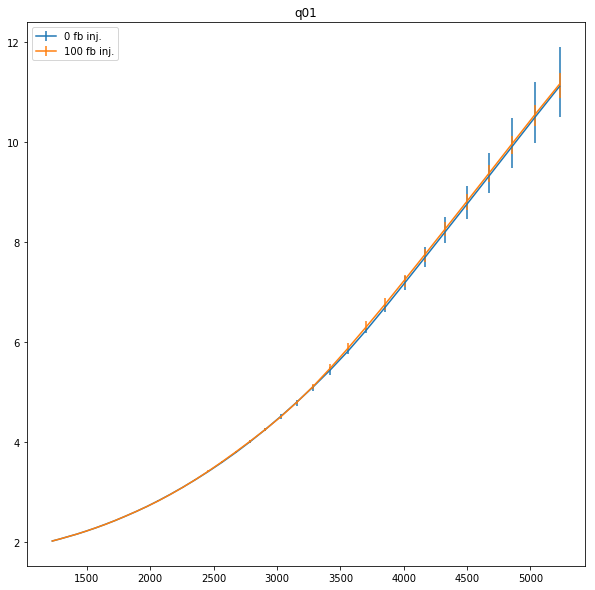

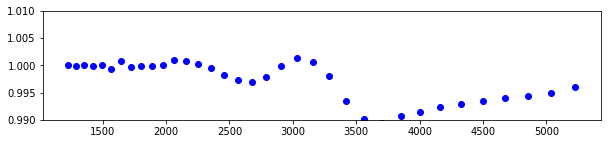

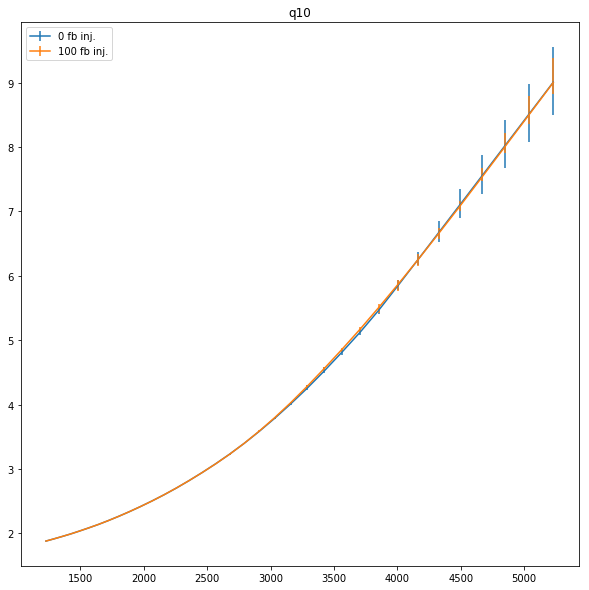

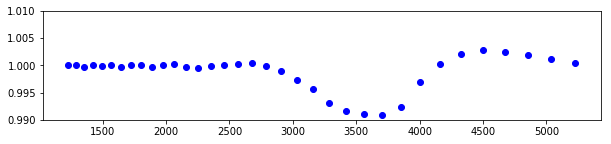

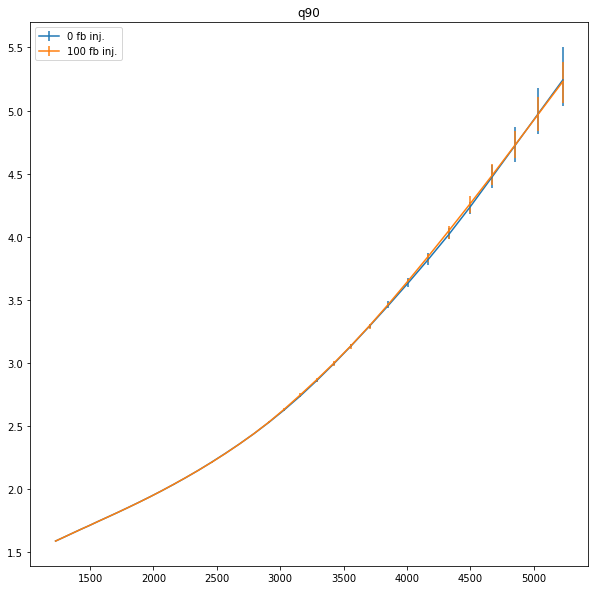

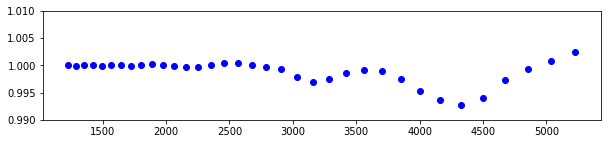

In [8]:
f0 = open('/eos/project/d/dshep/TOPCLASS/DijetAnomaly/QR_models/envelope/cut_stats.json',)
f100 = open ('cut_stats_allQ_GtoWW35na.json',)
qr_unc0 = json.load(f0)
qr_unc100 = json.load(f100)

qrs = ['01','10','90']

for qr in qrs:
    qstring = 'q{}'.format(qr)
    xs0_x      = np.array([i[0] for i in qr_unc0[qstring]])
    xs0_y      = np.array([i[1] for i in qr_unc0[qstring]])
    xs0_y_down = np.fabs(xs0_y-np.array([i[3] for i in qr_unc0[qstring]]))
    xs0_y_up   = np.fabs(xs0_y-np.array([i[4] for i in qr_unc0[qstring]]))
    xs0_x      = xs0_x     [:35] 
    xs0_y      = xs0_y     [:35] 
    xs0_y_down = xs0_y_down[:35] 
    xs0_y_up   = xs0_y_up  [:35] 
    
    xs100_x      = np.array([i[0] for i in qr_unc100[qstring]])
    xs100_y      = np.array([i[1] for i in qr_unc100[qstring]])
    xs100_y_down = np.fabs(xs100_y-np.array([i[3] for i in qr_unc100[qstring]]))
    xs100_y_up   = np.fabs(xs100_y-np.array([i[4] for i in qr_unc100[qstring]]))
    xs100_x      = xs100_x     [:35] 
    xs100_y      = xs100_y     [:35] 
    xs100_y_down = xs100_y_down[:35] 
    xs100_y_up   = xs100_y_up  [:35] 
    

    fig, ax1 = plt.subplots(figsize=(10,10))

    xs0_asymmetric_error = [xs0_y_down, xs0_y_up]
    xs100_asymmetric_error = [xs100_y_down, xs100_y_up]

    ax1.errorbar(xs0_x, xs0_y, yerr=xs0_asymmetric_error, fmt='-',label='0 fb inj.')
    ax1.errorbar(xs100_x, xs100_y, yerr=xs100_asymmetric_error, fmt='-',label='100 fb inj.')
    ax1.legend(loc='upper left')
    ax1.set_title(qstring)
    fig.savefig('qrRatio{}.pdf'.format(qr))
    fig2, ax2 = plt.subplots(figsize=(10,2))
    ratio = xs0_y/xs100_y
    plt.plot(xs0_x, ratio, "o",color="blue")
    plt.ylim([0.99,1.01])
    plt.show()
    fig2.savefig('qrRatio{}.pdf'.format(qr))
    